<a href="https://colab.research.google.com/github/Anjan-AI/TSAI-EVA5/blob/master/Session%209%20-%20DATA%20AUGMENTATION/EVA5_Session_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Added the modular files to the drive and added to path

In [1]:
!git clone https://github.com/Anjan-AI/TSAI-EVA5.git

Cloning into 'TSAI-EVA5'...
remote: Enumerating objects: 253, done.
remote: Counting objects: 100% (253/253), done.
remote: Compressing objects: 100% (220/220), done.
remote: Total 448 (delta 75), reused 172 (delta 27), pack-reused 195
Receiving objects: 100% (448/448), 3.86 MiB | 18.13 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [1]:
import sys
sys.path.append('/content/TSAI-EVA5/Session 9 - DATA AUGMENTATION')

### Import all the Library

In [2]:
import torch
import os
import torchvision
import torchvision.transforms as transfroms
from Dataset.dataset import Dataset,cifar10_classes
from Dataset.image_augmentations import AlbumentationTransforms
from Utils.SetCuda import set_seed,initialize_cuda
from Utils.utilities import print_model_summary,cross_entropy_loss
from Utils.show_image import imshow ,show_train_data
from models.resnet import ResNet18
from Training.Training_Testing import train ,test,runmodel

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [4]:
classes = cifar10_classes()
#define the transformation 
train_transform = AlbumentationTransforms(augmentation = True, mean=(0.4914, 0.4822, 0.4465) ,std_dev =(0.2471, 0.2435, 0.2616),horizontal_flip_prob=0.5,vertical_flip_prob=0.5,rotate_degree =30.0,cutout= True)
test_transform = AlbumentationTransforms()
# allocate the transfroamtions to the the Data class
Data = Dataset(train_transform, test_transform)
# downlaod the data
train_set = Data.download_cifar10dataset(train = True)
test_set = Data.download_cifar10dataset(train = False)

#check for the GUP avaliblbity and manual seeding
seed =1
cuda,device = initialize_cuda(seed)

Files already downloaded and verified
Files already downloaded and verified
GPU Available? True


In [5]:
# Load the test and train data , set the batch size & Num_workeres.
train_loader = Data.data_loader(train_set,cuda= cuda ,batch_size = 64 , num_workers = 4 )
test_loader = Data.data_loader(test_set,cuda= cuda ,batch_size = 64 , num_workers = 4 )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

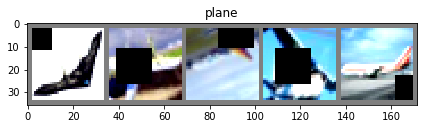

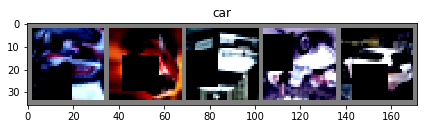

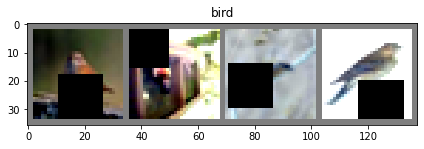

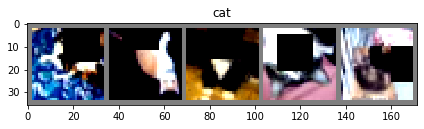

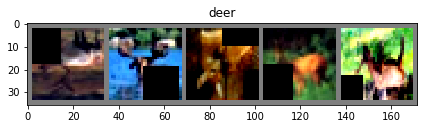

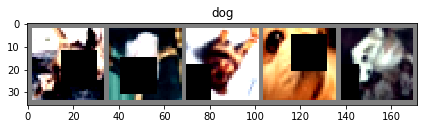

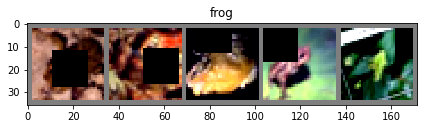

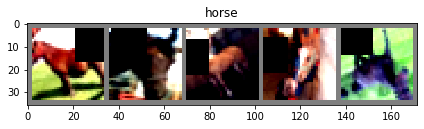

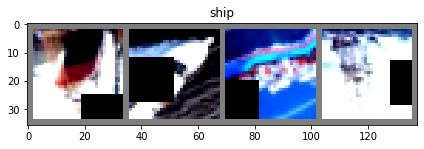

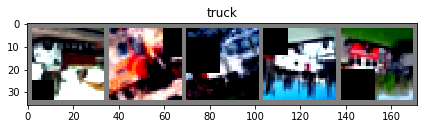

In [6]:
show_train_data(train_loader, classes)

In [7]:
# laod the model and print teh summary
model = ResNet18()
print_model_summary(model, input_size = (3,32,32),device =device)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [8]:
EPOCHS = 55 # set the no of epcohs

criterion = cross_entropy_loss()  # Create loss function
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) #define optimzer
scheduler = StepLR(optimizer, step_size=30, gamma=0.1) # define scheduler
train_losses = []
test_losses = []
train_acc = []
test_acc = []
print(device)
model = model.to(device)
runmodel(model,device,train_loader,test_loader,optimizer,scheduler,EPOCHS,criterion, train_losses,train_acc,test_losses,test_acc)



  0%|          | 0/782 [00:00<?, ?it/s]

cuda
EPOCH: 0


Loss=1.2821797132492065 Batch_id=781 Accuracy=37.67: 100%|██████████| 782/782 [01:05<00:00, 11.97it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0284, Accuracy: 3595/10000 (35.95%)

EPOCH: 1


Loss=1.0104022026062012 Batch_id=781 Accuracy=50.55: 100%|██████████| 782/782 [01:10<00:00, 11.06it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 4661/10000 (46.61%)

EPOCH: 2


Loss=1.0974311828613281 Batch_id=781 Accuracy=57.56: 100%|██████████| 782/782 [01:10<00:00, 11.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 4711/10000 (47.11%)

EPOCH: 3


Loss=0.7374001145362854 Batch_id=781 Accuracy=61.78: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0167, Accuracy: 6258/10000 (62.58%)

EPOCH: 4


Loss=0.9817068576812744 Batch_id=781 Accuracy=65.54: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0162, Accuracy: 6376/10000 (63.76%)

EPOCH: 5


Loss=0.7329265475273132 Batch_id=781 Accuracy=67.53: 100%|██████████| 782/782 [01:10<00:00, 11.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0160, Accuracy: 6376/10000 (63.76%)

EPOCH: 6


Loss=1.4458794593811035 Batch_id=781 Accuracy=69.86: 100%|██████████| 782/782 [01:10<00:00, 11.06it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0168, Accuracy: 6408/10000 (64.08%)

EPOCH: 7


Loss=1.2062679529190063 Batch_id=781 Accuracy=71.48: 100%|██████████| 782/782 [01:10<00:00, 11.06it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0143, Accuracy: 6841/10000 (68.41%)

EPOCH: 8


Loss=1.3165490627288818 Batch_id=781 Accuracy=72.66: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0154, Accuracy: 6691/10000 (66.91%)

EPOCH: 9


Loss=0.4977971613407135 Batch_id=781 Accuracy=74.19: 100%|██████████| 782/782 [01:10<00:00, 11.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0218, Accuracy: 5781/10000 (57.81%)

EPOCH: 10


Loss=0.6816349029541016 Batch_id=781 Accuracy=75.02: 100%|██████████| 782/782 [01:10<00:00, 11.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0151, Accuracy: 6807/10000 (68.07%)

EPOCH: 11


Loss=0.5010409951210022 Batch_id=781 Accuracy=76.24: 100%|██████████| 782/782 [01:10<00:00, 11.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0128, Accuracy: 7156/10000 (71.56%)

EPOCH: 12


Loss=0.658467173576355 Batch_id=781 Accuracy=76.87: 100%|██████████| 782/782 [01:10<00:00, 11.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0125, Accuracy: 7364/10000 (73.64%)

EPOCH: 13


Loss=0.5705468654632568 Batch_id=781 Accuracy=78.28: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0122, Accuracy: 7393/10000 (73.93%)

EPOCH: 14


Loss=0.24895088374614716 Batch_id=781 Accuracy=78.90: 100%|██████████| 782/782 [01:10<00:00, 11.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 7710/10000 (77.10%)

EPOCH: 15


Loss=0.41764891147613525 Batch_id=781 Accuracy=79.55: 100%|██████████| 782/782 [01:10<00:00, 11.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0149, Accuracy: 6997/10000 (69.97%)

EPOCH: 16


Loss=0.4997154474258423 Batch_id=781 Accuracy=80.01: 100%|██████████| 782/782 [01:10<00:00, 11.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0124, Accuracy: 7322/10000 (73.22%)

EPOCH: 17


Loss=0.5161625742912292 Batch_id=781 Accuracy=80.61: 100%|██████████| 782/782 [01:10<00:00, 11.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0114, Accuracy: 7557/10000 (75.57%)

EPOCH: 18


Loss=0.5345573425292969 Batch_id=781 Accuracy=81.13: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0127, Accuracy: 7425/10000 (74.25%)

EPOCH: 19


Loss=0.4449295997619629 Batch_id=781 Accuracy=81.52: 100%|██████████| 782/782 [01:10<00:00, 11.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 8089/10000 (80.89%)

EPOCH: 20


Loss=0.9678703546524048 Batch_id=781 Accuracy=82.05: 100%|██████████| 782/782 [01:10<00:00, 11.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 7695/10000 (76.95%)

EPOCH: 21


Loss=0.5802952647209167 Batch_id=781 Accuracy=82.49: 100%|██████████| 782/782 [01:10<00:00, 11.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 7769/10000 (77.69%)

EPOCH: 22


Loss=0.26930785179138184 Batch_id=781 Accuracy=82.97: 100%|██████████| 782/782 [01:10<00:00, 11.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 8077/10000 (80.77%)

EPOCH: 23


Loss=0.818918764591217 Batch_id=781 Accuracy=83.29: 100%|██████████| 782/782 [01:10<00:00, 11.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 8064/10000 (80.64%)

EPOCH: 24


Loss=0.4707234799861908 Batch_id=781 Accuracy=83.76: 100%|██████████| 782/782 [01:10<00:00, 11.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0117, Accuracy: 7705/10000 (77.05%)

EPOCH: 25


Loss=0.09509030729532242 Batch_id=781 Accuracy=84.37: 100%|██████████| 782/782 [01:10<00:00, 11.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 8024/10000 (80.24%)

EPOCH: 26


Loss=0.8398681879043579 Batch_id=781 Accuracy=84.64: 100%|██████████| 782/782 [01:10<00:00, 11.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 8175/10000 (81.75%)

EPOCH: 27


Loss=0.1874784231185913 Batch_id=781 Accuracy=85.11: 100%|██████████| 782/782 [01:10<00:00, 11.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 7823/10000 (78.23%)

EPOCH: 28


Loss=0.47648510336875916 Batch_id=781 Accuracy=85.29: 100%|██████████| 782/782 [01:10<00:00, 11.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 8116/10000 (81.16%)

EPOCH: 29


Loss=0.5275397300720215 Batch_id=781 Accuracy=85.54: 100%|██████████| 782/782 [01:10<00:00, 11.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 7849/10000 (78.49%)

EPOCH: 30


Loss=0.30759039521217346 Batch_id=781 Accuracy=88.35: 100%|██████████| 782/782 [01:10<00:00, 11.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 8399/10000 (83.99%)

EPOCH: 31


Loss=0.19005024433135986 Batch_id=781 Accuracy=89.12: 100%|██████████| 782/782 [01:10<00:00, 11.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 8386/10000 (83.86%)

EPOCH: 32


Loss=0.15374737977981567 Batch_id=781 Accuracy=89.28: 100%|██████████| 782/782 [01:10<00:00, 11.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 8490/10000 (84.90%)

EPOCH: 33


Loss=0.11554943025112152 Batch_id=781 Accuracy=89.69: 100%|██████████| 782/782 [01:10<00:00, 11.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 8489/10000 (84.89%)

EPOCH: 34


Loss=0.13623186945915222 Batch_id=781 Accuracy=89.69: 100%|██████████| 782/782 [01:10<00:00, 11.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 8412/10000 (84.12%)

EPOCH: 35


Loss=0.36810943484306335 Batch_id=781 Accuracy=89.92: 100%|██████████| 782/782 [01:10<00:00, 11.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 8461/10000 (84.61%)

EPOCH: 36


Loss=0.30764681100845337 Batch_id=781 Accuracy=90.18: 100%|██████████| 782/782 [01:10<00:00, 11.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 8482/10000 (84.82%)

EPOCH: 37


Loss=0.2748531401157379 Batch_id=781 Accuracy=90.34: 100%|██████████| 782/782 [01:10<00:00, 11.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 8468/10000 (84.68%)

EPOCH: 38


Loss=0.4132557213306427 Batch_id=781 Accuracy=90.41: 100%|██████████| 782/782 [01:10<00:00, 11.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 8486/10000 (84.86%)

EPOCH: 39


Loss=0.46630769968032837 Batch_id=781 Accuracy=90.38: 100%|██████████| 782/782 [01:10<00:00, 11.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 8474/10000 (84.74%)

EPOCH: 40


Loss=0.5364854335784912 Batch_id=781 Accuracy=90.48: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 8469/10000 (84.69%)

EPOCH: 41


Loss=0.2633822560310364 Batch_id=781 Accuracy=90.48: 100%|██████████| 782/782 [01:10<00:00, 11.06it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 8478/10000 (84.78%)

EPOCH: 42


Loss=0.0449126735329628 Batch_id=781 Accuracy=90.71: 100%|██████████| 782/782 [01:10<00:00, 11.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 8527/10000 (85.27%)

EPOCH: 43


Loss=0.5079498291015625 Batch_id=781 Accuracy=90.79: 100%|██████████| 782/782 [01:10<00:00, 11.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 8546/10000 (85.46%)

EPOCH: 44


Loss=0.019500374794006348 Batch_id=781 Accuracy=90.75: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 8507/10000 (85.07%)

EPOCH: 45


Loss=0.5742403864860535 Batch_id=781 Accuracy=90.74: 100%|██████████| 782/782 [01:10<00:00, 11.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 8548/10000 (85.48%)

EPOCH: 46


Loss=0.2819323241710663 Batch_id=781 Accuracy=91.11: 100%|██████████| 782/782 [01:10<00:00, 11.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 8427/10000 (84.27%)

EPOCH: 47


Loss=0.6004312634468079 Batch_id=781 Accuracy=91.00: 100%|██████████| 782/782 [01:10<00:00, 11.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 8542/10000 (85.42%)

EPOCH: 48


Loss=0.538975715637207 Batch_id=781 Accuracy=91.30: 100%|██████████| 782/782 [01:10<00:00, 11.05it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 8455/10000 (84.55%)

EPOCH: 49


Loss=0.2688833475112915 Batch_id=781 Accuracy=91.18: 100%|██████████| 782/782 [01:10<00:00, 11.06it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 8515/10000 (85.15%)

EPOCH: 50


Loss=0.13123293220996857 Batch_id=781 Accuracy=91.38: 100%|██████████| 782/782 [01:10<00:00, 11.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 8488/10000 (84.88%)

EPOCH: 51


Loss=0.09220406413078308 Batch_id=781 Accuracy=91.39: 100%|██████████| 782/782 [01:10<00:00, 11.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 8522/10000 (85.22%)

EPOCH: 52


Loss=0.42968636751174927 Batch_id=781 Accuracy=91.48: 100%|██████████| 782/782 [01:10<00:00, 11.06it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 8460/10000 (84.60%)

EPOCH: 53


Loss=0.11876929551362991 Batch_id=781 Accuracy=91.51: 100%|██████████| 782/782 [01:10<00:00, 11.06it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 8547/10000 (85.47%)

EPOCH: 54


Loss=0.768800675868988 Batch_id=781 Accuracy=91.79: 100%|██████████| 782/782 [01:10<00:00, 11.08it/s]



Test set: Average loss: 0.0075, Accuracy: 8520/10000 (85.20%)

